# **MACHINE LEARNING DASAR #2**

In [110]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
from fungsi import sigmoid 

# Generate DataFrame

## Data Udin

In [111]:
# tinggi badan 
x1 = np.array([18 + 1*np.random.randn() for i in range (1, 100)])
# berat badan 
x2 = np.array([5 + 1*np.random.randn() for i in range (1, 100)])
#  status udin
y1 = np.array([1 for i in range(1, 100)])
# status asep
y2 = np.array([0 for i in range(1, 100)])
# label
label = ["udin" for i in range(1, 100)]

# data kompilasi
data_udin = {
    'x1':x1,
    'x2':x2,
    'y1':y1,
    'y2':y2,
    "label":label,
}

# data frame
data_frame_1 = pd.DataFrame(data = data_udin)
print(data_frame_1)

           x1        x2  y1  y2 label
0   17.324442  6.797467   1   0  udin
1   18.970661  4.755912   1   0  udin
2   17.512666  5.221776   1   0  udin
3   17.433802  5.683804   1   0  udin
4   16.373536  5.376970   1   0  udin
..        ...       ...  ..  ..   ...
94  16.635950  5.617990   1   0  udin
95  17.400815  3.892675   1   0  udin
96  18.447305  6.482409   1   0  udin
97  18.336469  7.034929   1   0  udin
98  18.183059  4.856613   1   0  udin

[99 rows x 5 columns]


## Data Asep

In [112]:
# tinggi badan 
x1 = np.array([10 + 1*np.random.randn() for i in range (1, 100)])
# berat badan 
x2 = np.array([8 + 1*np.random.randn() for i in range (1, 100)])
#  status udin
y1 = np.array([0 for i in range(1, 100)])
# status asep
y2 = np.array([1 for i in range(1, 100)])
# label
label = ["asep" for i in range(1, 100)]

# data kompilasi
data_asep = {
    'x1':x1,
    'x2':x2,
    'y1':y1,
    'y2':y2,
    "label":label,
}

# data frame
data_frame_2 = pd.DataFrame(data = data_asep)
print(data_frame_2)

           x1        x2  y1  y2 label
0   10.411613  8.768282   0   1  asep
1    9.856729  9.180598   0   1  asep
2    9.411106  7.832481   0   1  asep
3   10.189030  8.500474   0   1  asep
4    9.317255  8.773628   0   1  asep
..        ...       ...  ..  ..   ...
94  10.242344  8.827163   0   1  asep
95   9.551639  8.461477   0   1  asep
96  10.289208  8.693614   0   1  asep
97  10.036528  8.691211   0   1  asep
98   9.390037  8.703063   0   1  asep

[99 rows x 5 columns]


# Gabungkan Data

In [113]:
data_frame = pd.concat([data_frame_1,data_frame_2])
data_frame = shuffle(data_frame)
data_frame.reset_index(inplace=True, drop=True)
print(data_frame)

            x1        x2  y1  y2 label
0    11.581490  7.822468   0   1  asep
1     9.858914  8.870386   0   1  asep
2    17.686916  5.803340   1   0  udin
3     9.317255  8.773628   0   1  asep
4     9.917367  9.452929   0   1  asep
..         ...       ...  ..  ..   ...
193   8.254221  6.763496   0   1  asep
194  18.930632  4.489144   1   0  udin
195   9.615530  7.930609   0   1  asep
196  10.242344  8.827163   0   1  asep
197  17.702833  4.401791   1   0  udin

[198 rows x 5 columns]


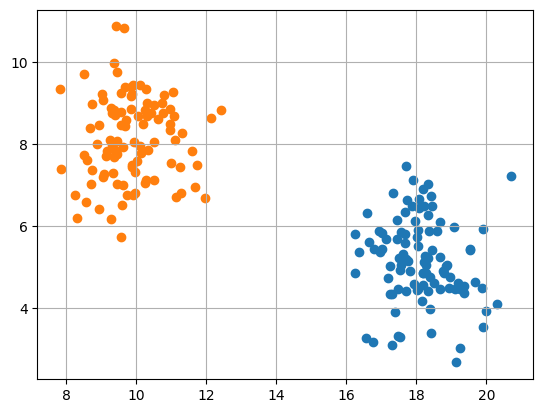

In [114]:
plt.scatter(data_frame_1.x1, data_frame_1.x2)
plt.scatter(data_frame_2.x1, data_frame_2.x2)
plt.grid(True)
plt.show()

# **Neural Network**

## 1.Matrix Weight

In [115]:
w11 = np.random.uniform(-0.01,0.01) 
w12 = np.random.uniform(-0.01,0.01)
w21 = np.random.uniform(-0.01,0.01)
w22 = np.random.uniform(-0.01,0.01)

w = np.array([[w11,w12], [w21,w22]])

print(w)

[[ 0.00144933  0.00689425]
 [ 0.00148683 -0.00122845]]


## 2.Iteration Neural Network

In [116]:
learning_rate = 0.1
answer = []
error_array = np.zeros((2,len(data_frame)))
for index, baris in data_frame.iterrows():
    w_lama = w
    input = np.array([[baris.x1],[baris.x2]])
    output_hidden = np.dot(w_lama,input)
    output_learn = sigmoid(output_hidden)
    output_actual = np.array([[baris.y1],[baris.y2]])

    error = output_actual - output_learn

    delta_w = np.dot(learning_rate*error*output_learn*(1-output_learn),input.T)
    w_baru = w_lama + delta_w
    w = w_baru

    error_array[:,index] = error.T*error.T
    tebakan = np.argmax(output_learn)
    jawaban = np.argmax(output_actual)

    label_tebakan = "asep" if tebakan == 1 else "udin"
    
    # print(output_hidden)

    print(f"index = {index} | tebakan = {label_tebakan} | jawaban = {baris.label}")

    if tebakan == jawaban:
        answer.append(1)
    else: 
        answer.append(0)

index = 0 | tebakan = udin | jawaban = asep
index = 1 | tebakan = asep | jawaban = asep
index = 2 | tebakan = asep | jawaban = udin
index = 3 | tebakan = asep | jawaban = asep
index = 4 | tebakan = asep | jawaban = asep
index = 5 | tebakan = asep | jawaban = asep
index = 6 | tebakan = asep | jawaban = udin
index = 7 | tebakan = asep | jawaban = asep
index = 8 | tebakan = asep | jawaban = udin
index = 9 | tebakan = udin | jawaban = udin
index = 10 | tebakan = udin | jawaban = udin
index = 11 | tebakan = udin | jawaban = asep
index = 12 | tebakan = udin | jawaban = asep
index = 13 | tebakan = udin | jawaban = udin
index = 14 | tebakan = udin | jawaban = udin
index = 15 | tebakan = udin | jawaban = asep
index = 16 | tebakan = asep | jawaban = asep
index = 17 | tebakan = asep | jawaban = udin
index = 18 | tebakan = udin | jawaban = asep
index = 19 | tebakan = asep | jawaban = asep
index = 20 | tebakan = asep | jawaban = asep
index = 21 | tebakan = asep | jawaban = asep
index = 22 | tebakan

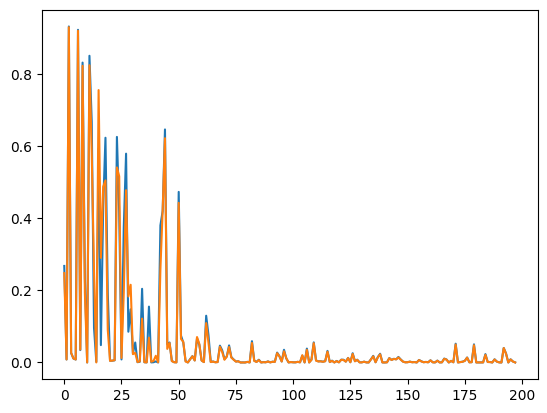

In [117]:
plt.plot(error_array.T)

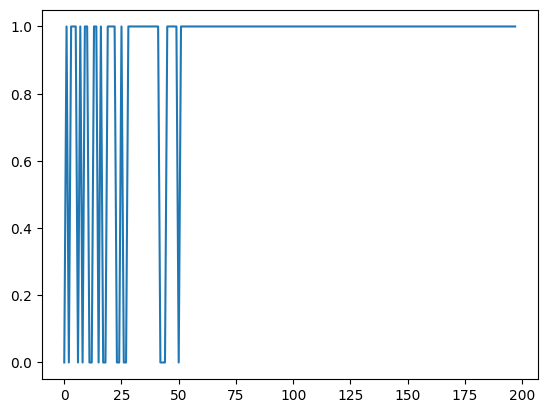

In [118]:
plt.plot(answer)

In [119]:
# tinggi badan
x1 = 18
# berat badan
x2 = 5

input = np.array([[x1], [x2]])
output_hidden =np.dot(w,input)
output_prediction = sigmoid(output_hidden)

prediction = np.argmax(output_prediction)

label_prediction = "asep" if prediction == 1 else "udin"

print(f"tinggi = {x1*10} | berat = {x2*10} | adalah = {label_prediction}")

tinggi = 180 | berat = 50 | adalah = udin
